# 메자닌(CB, BW)
유튜브 영상: https://youtu.be/zVzX0cm0BHU

### OPEN DART에서 고유번호 다운로드

In [1]:
crtfc_key = [API_KEY]

In [2]:
import requests
url = 'https://opendart.fss.or.kr/api/corpCode.xml'
res = requests.get(url, params={'crtfc_key':crtfc_key})
res.status_code

200

In [3]:
from io import BytesIO
import zipfile
data = zipfile.ZipFile(BytesIO(res.content))
data.namelist()

['CORPCODE.xml']

In [4]:
import xmltodict
import json

data_xml = data.read('CORPCODE.xml').decode('utf-8')
data_odict = xmltodict.parse(data_xml)
data_dict = json.loads(json.dumps(data_odict))
corps = data_dict.get('result', {}).get('list')
corps[:2]

[{'corp_code': '00434003',
  'corp_name': '다코',
  'stock_code': None,
  'modify_date': '20170630'},
 {'corp_code': '00434456',
  'corp_name': '일산약품',
  'stock_code': None,
  'modify_date': '20170630'}]

### 기업의 고유번호와 종목코드 찾기

In [5]:
company_name = 'HLB'

In [6]:
for i in range(len(corps)):
    corp_code, corp_name, stock_code, modify_date = corps[i].values()
    if corp_name == company_name:
        code = corp_code
        symbol = stock_code
        print('고유번호: ' + corp_code)
        print('종목코드: ' + stock_code)

고유번호: 00199252
종목코드: 028300


### CB

In [7]:
url = 'https://opendart.fss.or.kr/api/cvbdIsDecsn.json'
params = {'crtfc_key':crtfc_key, 'corp_code':code, 'bgn_de':'20190329', 'end_de':'20220329'} 
cb = requests.get(url, params=params)

In [8]:
for c in cb.json()['list']:
    date = c['rcept_no'][:8]
    print(date)
    print(c['bd_knd'])
    print(c['bd_fta'])
    print(' ')

20191216
무기명식 무보증 사모 전환사채
40,000,000,000
 


In [9]:
import FinanceDataReader as fdr
frame = fdr.DataReader(symbol=symbol, start=date, end='20201216')
frame.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-16,43621,44376,43222,43667,502570,0.002042
2019-12-17,44287,45263,43755,44199,982328,0.012183
2019-12-18,44421,44598,43222,43933,803231,-0.006018
2019-12-19,44376,44775,43666,43889,735815,-0.001002
2019-12-20,43932,45663,43711,45353,2049835,0.033357


In [10]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

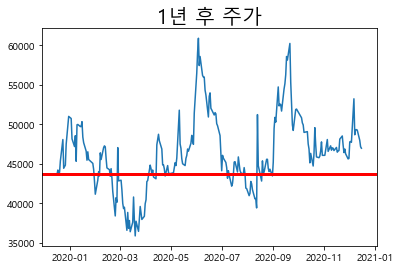

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(frame['Close'])
plt.axhline(y=frame['Close'][0], color='r', linewidth=3)
plt.title('1년 후 주가', fontsize=20)
plt.show()

In [15]:
point = frame['Close'][0]
low_point = min(frame['Close'])

In [18]:
round(((low_point- point) / point) * 100,2)

-17.89

### BW

In [23]:
url = 'https://opendart.fss.or.kr/api/bdwtIsDecsn.json'
params = {'crtfc_key':crtfc_key, 'corp_code':code, 'bgn_de':'20190329', 'end_de':'20220329'} 
bw = requests.get(url, params=params)

In [24]:
for b in bw.json()['list']:
    print(b['rcept_no'][:8])
    print(b['bd_knd'])
    print(b['bd_fta'])
    print(' ')

20211021
무기명식 무보증 사모
비분리형 신주인수권부사채
57,000,000,000
 
20220329
무기명식 무보증 사모
비분리형 신주인수권부사채
25,200,000,000
 


In [25]:
import FinanceDataReader as fdr
frame = fdr.DataReader(symbol=symbol, start='20211021')

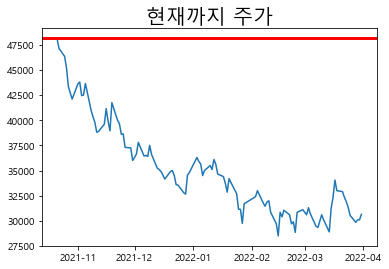

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(frame['Close'])
plt.axhline(y=frame['Close'][0], color='r', linewidth=3)
plt.title('현재까지 주가', fontsize=20)
plt.show()

In [27]:
point = frame['Close'][0]
low_point = min(frame['Close'])

In [28]:
round(((low_point- point) / point) * 100,2)

-40.81